# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './Part01/'

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365 # day-age to year-age

In [5]:
#自 20 到 70 歲，切 11 個點 (得到 10 組)
bin_cut = np.linspace(start = 20, stop = 70, num = 11)
app_train['YEARS_BINNED'] = pd.cut(app_train['YEARS_BIRTH'], bins = bin_cut) 

# 顯示不同組的數量
print(app_train['YEARS_BINNED'].value_counts().sort_index())
app_train.head()

(20.0, 25.0]    12159
(25.0, 30.0]    32862
(30.0, 35.0]    39440
(35.0, 40.0]    42868
(40.0, 45.0]    41406
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(60.0, 65.0]    27476
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,YEARS_BIRTH,YEARS_BINNED
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,False,25.920548,"(25.0, 30.0]"
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,False,45.931507,"(45.0, 50.0]"
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,False,52.180822,"(50.0, 55.0]"
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,False,52.068493,"(50.0, 55.0]"
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,False,54.608219,"(50.0, 55.0]"


In [6]:
app_train[['TARGET', 'DAYS_BIRTH', 'YEARS_BIRTH', 'YEARS_BINNED']].groupby('YEARS_BINNED').mean()

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


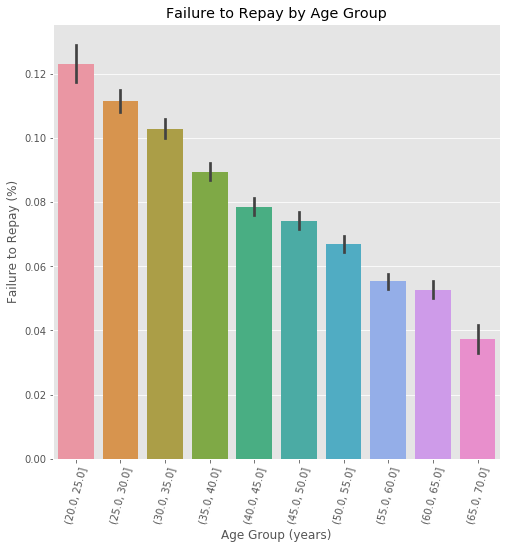

In [7]:
# 改變繪圖樣式 (style)
plt.style.use('ggplot')

plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
sns.barplot(app_train['YEARS_BINNED'], app_train['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

# 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

#### 聘僱日數 DAYS_EMPLOYED

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64


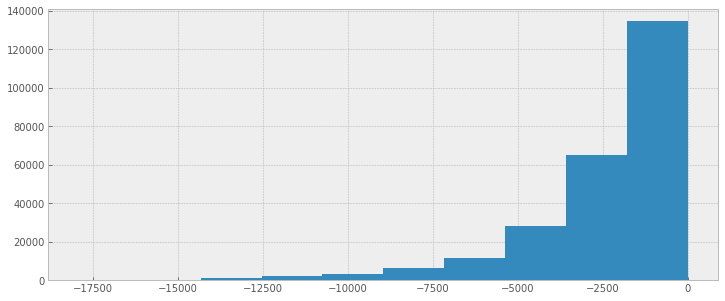

In [8]:
# 改變繪圖樣式 (style)
plt.style.use('bmh')

# 了解資料分布
print(app_train['DAYS_EMPLOYED'].describe())
app_train['DAYS_EMPLOYED'].hist(figsize=(12, 5))

In [9]:
# 取絕對值
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])

# 轉換成年資
app_train['YEARS_EMPLOYED'] = app_train['DAYS_EMPLOYED'] / 365
app_train[['DAYS_EMPLOYED','YEARS_EMPLOYED']].describe()

,DAYS_EMPLOYED,YEARS_EMPLOYED
count,252137.000000,252137.000000
mean,2384.169325,6.531971
std,2338.360162,6.406466
min,0.000000,0.000000
25%,767.000000,2.101370
50%,1648.000000,4.515068
75%,3175.000000,8.698630
max,17912.000000,49.073973


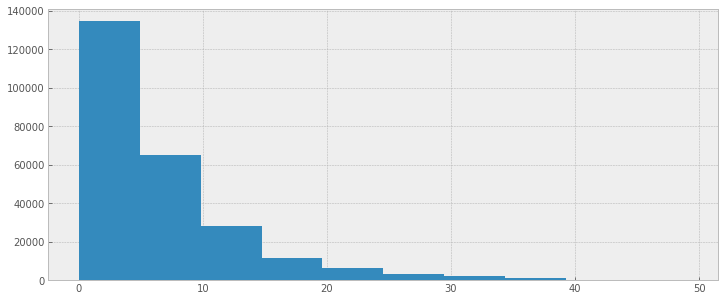

In [10]:
app_train['YEARS_EMPLOYED'].hist(figsize=(12, 5))

In [11]:
# 確認年齡和工作年資無衝突
print(app_train[['YEARS_EMPLOYED','YEARS_BIRTH']].corr()['YEARS_BIRTH'])
print(app_train[app_train['YEARS_EMPLOYED'] > app_train['YEARS_BIRTH']].shape)
(app_train['YEARS_BIRTH'] - app_train['YEARS_EMPLOYED']).describe()

YEARS_EMPLOYED    0.352321
YEARS_BIRTH       1.000000
Name: YEARS_BIRTH, dtype: float64
(0, 126)


count    252137.000000
mean         33.931408
std           9.820123
min          17.928767
25%          25.835616
50%          32.745205
75%          40.958904
max          68.210959
dtype: float64

In [12]:
# 離散化: 等頻劃分
app_train["freq_YEARS_EMPLOYED"] = pd.qcut(app_train['YEARS_EMPLOYED'], 4)
app_train["freq_YEARS_EMPLOYED"].value_counts().sort_index()

(-0.001, 2.101]    63056
(2.101, 4.515]     63068
(4.515, 8.699]     62980
(8.699, 49.074]    63033
Name: freq_YEARS_EMPLOYED, dtype: int64

In [13]:
app_train[['TARGET', 'YEARS_EMPLOYED', 'YEARS_BIRTH','freq_YEARS_EMPLOYED']].groupby('freq_YEARS_EMPLOYED').mean()

,TARGET,YEARS_EMPLOYED,YEARS_BIRTH
freq_YEARS_EMPLOYED,,,
"(-0.001, 2.101]",0.112075,1.121071,37.537275
"(2.101, 4.515]",0.101811,3.230063,38.346312
"(4.515, 8.699]",0.078326,6.401928,40.529364
"(8.699, 49.074]",0.054162,15.378520,45.442862


In [14]:
# 離散化: 參考等頻劃分調整間距
app_train["binned_YEARS_EMPLOYED"] = pd.cut(app_train['YEARS_EMPLOYED'], bins = [-1, 2, 5, 9, 15, 50])
app_train["binned_YEARS_EMPLOYED"].value_counts().sort_index()

(-1, 2]     59827
(2, 5]      76484
(5, 9]      55889
(9, 15]     36532
(15, 50]    23405
Name: binned_YEARS_EMPLOYED, dtype: int64

In [15]:
app_train[['TARGET', 'YEARS_EMPLOYED', 'YEARS_BIRTH', 'binned_YEARS_EMPLOYED']].groupby('binned_YEARS_EMPLOYED').mean()

,TARGET,YEARS_EMPLOYED,YEARS_BIRTH
binned_YEARS_EMPLOYED,,,
"(-1, 2]",0.112023,1.070879,37.532452
"(2, 5]",0.100779,3.382668,38.472848
"(5, 9]",0.075399,6.838779,40.787513
"(9, 15]",0.059099,11.562689,43.643528
"(15, 50]",0.044948,22.197964,48.722275


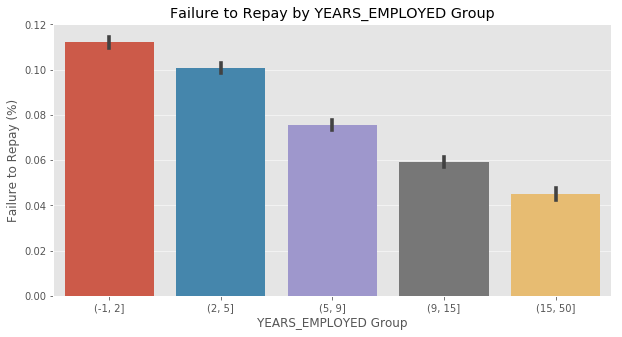

In [16]:
# 改變繪圖樣式 (style)
plt.style.use('ggplot')

plt.figure(figsize = (10, 5))

# barplot
sns.barplot(app_train['binned_YEARS_EMPLOYED'], app_train['TARGET'])

# Plot labeling
plt.xlabel('YEARS_EMPLOYED Group')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by YEARS_EMPLOYED Group')
plt.show()

#### DEF_30_CNT_SOCIAL_CIRCLE 申請人社交周圍有多少人違約(30天)??

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


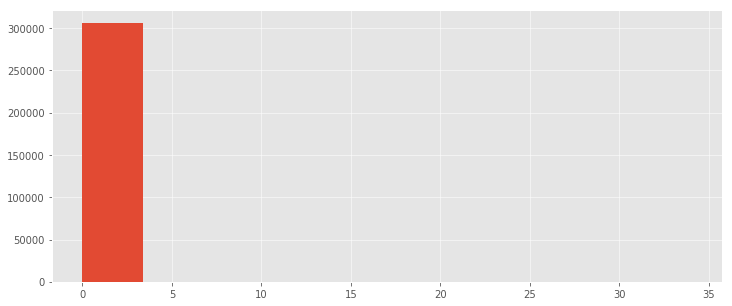

In [17]:
# 了解資料分布
print(app_train['DEF_30_CNT_SOCIAL_CIRCLE'].describe())
app_train['DEF_30_CNT_SOCIAL_CIRCLE'].hist(figsize=(12, 5))

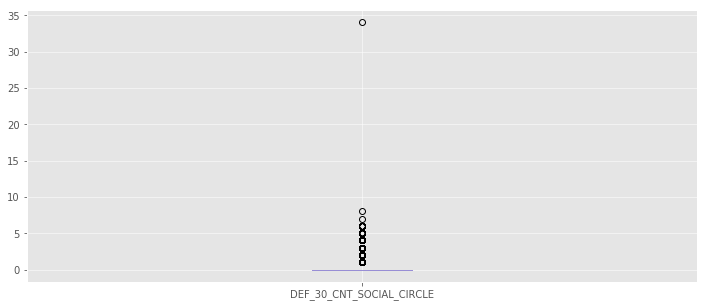

In [18]:
app_train.boxplot(column='DEF_30_CNT_SOCIAL_CIRCLE', figsize=(12, 5))

In [19]:
# 有或無
app_train["flag_DEF_30_CNT_SOCIAL_CIRCLE"] = [1 if x > 0 else 0 for x in app_train["DEF_30_CNT_SOCIAL_CIRCLE"]]
app_train["flag_DEF_30_CNT_SOCIAL_CIRCLE"].value_counts()

0    272345
1     35166
Name: flag_DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [20]:
app_train[['TARGET', 'DEF_30_CNT_SOCIAL_CIRCLE', 'flag_DEF_30_CNT_SOCIAL_CIRCLE']].\
        groupby('flag_DEF_30_CNT_SOCIAL_CIRCLE').mean()

,TARGET,DEF_30_CNT_SOCIAL_CIRCLE
flag_DEF_30_CNT_SOCIAL_CIRCLE,,
0,0.077600,0.000000
1,0.104959,1.249986


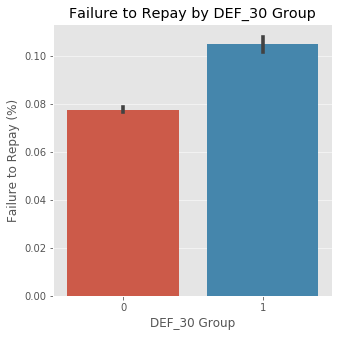

In [21]:
plt.figure(figsize = (5, 5))

# barplot
sns.barplot(app_train['flag_DEF_30_CNT_SOCIAL_CIRCLE'], app_train['TARGET'])

# Plot labeling
plt.xlabel('DEF_30 Group')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by DEF_30 Group')
plt.show()